# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [202]:
#Imports and Other Things
import autograd.numpy as np   
import matplotlib.pyplot as plt
from autograd import grad    

In [203]:
#Gradient Descent from HW 1
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)
    #array for the weight history
    weight_history = []
    #Append the initial weight
    weight_history.append(w)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        #Append at each step of gradient descent 
        weight_history.append(w)
        
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
                     
    #return the weight history        
    return weight_history

#Cost Function History output modified from  from HW1
def cost_history(weight_history,g):
    out = []
    # loop over weight history and compute associated cost function history at each step
    for w in weight_history:
        out.append(g(w))
    return out


In [204]:
#Import the data
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Define the model

def model(x,w):
    a = w[0]+ np.dot(x,w[1:])
    return a.T

In [205]:
#Softmax function (it's convex!) Realization
def softmax(w):
    g = np.sum(np.log(1+np.exp(-1.0*y*model(x,w))))
    return g/float(np.size(y))

In [206]:
#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]

#Minimization
#Alpha = 1
#1000 Iterations 
w_hx = gradient_descent(softmax, 1.0, 1000, w)

In [207]:
#Misclassification function 
def missclass(model, w_hx, x, y):
    #History var
    missclass_hx = []
    sgns = []
    
    #Test the fit with x and the model fit and the model
    for w in w_hx:
        #Get the signs of the variables (we only care about those here)
        sgns = np.sign(model(x,w))
        #Count the number of missclassified variables
        mcs = np.sum(1.0 - np.equal(sgns, y))
        #Append misclassifications
        missclass_hx.append(mcs)
        
    return missclass_hx

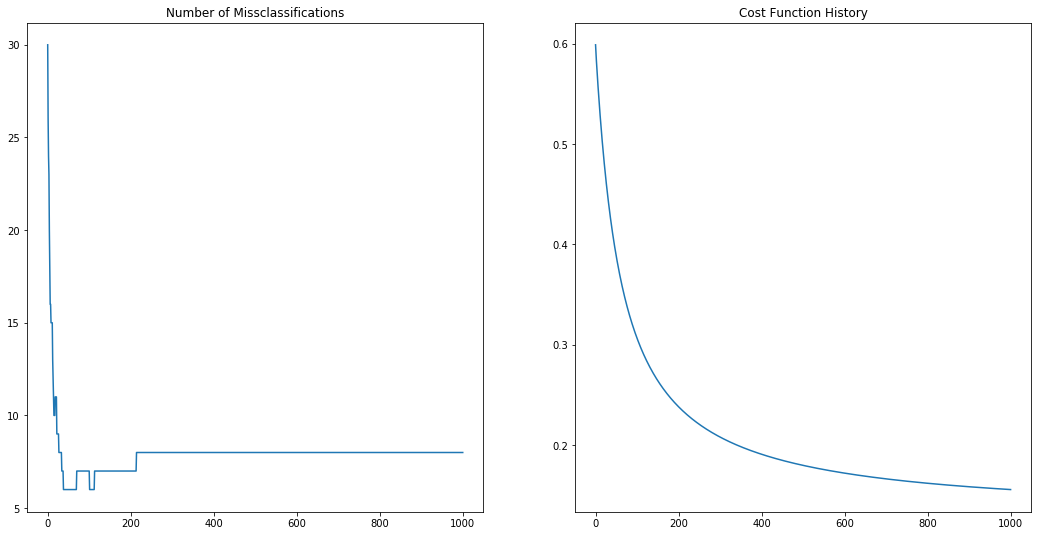

In [208]:
#Plots (One Plot for each misclassification and cost function history)
#Get the data for both
mc = missclass(model, w_hx, x,y)
cfxhx = cost_history(w_hx, softmax)

#Number of iterations
its = np.arange(0,len(w_hx))

# plot cost function history
fig, ax = plt.subplots(1, 2, figsize=(18,9))

# plot function and gradient values
ax[0].plot(its,mc)
ax[0].set_title("Number of Missclassifications")
ax[1].plot(its,cfxhx)
ax[1].set_title("Cost Function History")

plt.show()


#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [209]:
# we reuse the imports, we have the functions for:
# -- Softmax
# -- Gradient Descent
# -- Number of Misclassifications
# -- Cost Function History
# -- The Model 

#Here, we import the new data. 
csvname = 'breast_cancer_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Now, we run gradient descent again using 5000 its as states above
w_hx = gradient_descent(softmax, 1.0, 1000, w)

FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer_dataset.csv'

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>